# Compare irene and hypathia

In this notebook we compare pmaps produced with Hypathia and pmaps produced with diomira+irene

This city reads true waveforms from detsim and compute pmaps from them without simulating the electronics. This includes:

- Rebin 1-ns waveforms to 25-ns waveforms to match those produced by the detector.
- Produce a PMT-summed waveform.
- Apply a threshold to the PMT-summed waveform.
- Find pulses in the PMT-summed waveform.
- Match the time window of the PMT pulse with those in the SiPMs.
- Build the PMap object.

## Hypathia config file

In [ ]:
files_in = 'Kr83_NEW_v1_03_01_mcrd_v5_03_04_ACTIVE_10.2bar.0.h5'
file_out = 'Kr83_NEW_v1_03_01_hypathia_v5_03_04_ACTIVE_10.2bar.0.h5'

# compression library
compression = 'ZLIB4'

# run number 0 is for MC
run_number = -6400
detector_db = 'new'

# How frequently to print events
print_mod = 1

pmt_wfs_rebin = 25

# max number of events to run
event_range =  all

n_baseline =   28000 # for a window of 800 mus

# Set MAU for calibrated sum
n_mau   = 100
thr_mau =   3 * adc

# Set thresholds for calibrated sum
thr_csum_s1 = 0.5 * pes
thr_csum_s2 = 2.0 * pes

# Set MAU thresholds for SiPM
thr_sipm      = 1.0 * pes
thr_sipm_type = "common"


# Set parameters to search for S1
# Notice that in MC file S1 is in t=100 mus
s1_tmin       =  99 * mus # position of S1 in MC files at 100 mus
s1_tmax       = 101 * mus # change tmin and tmax if S1 not at 100 mus
s1_stride     =   4       # minimum number of 25 ns bins in S1 searches
s1_lmin       =   4       # 8 x 25 = 200 ns
s1_lmax       =  40       # 20 x 25 = 500 ns
s1_rebin_stride = 1       # Do not rebin S1 by default

# Set parameters to search for S2
s2_tmin     =    101 * mus # assumes S1 at 100 mus, change if S1 not at 100 mus
s2_tmax     =    799 * mus # end of the window
s2_stride   =     40       #  40 x 25 = 1   mus
s2_lmin     =     80       # 100 x 25 = 2.5 mus
s2_lmax     = 100000       # maximum value of S2 width
s2_rebin_stride = 40       # Rebin by default, 40 25 ns time bins to make one 1us time bin

# Set S2Si parameters
thr_sipm_s2 = 5 * pes  # Threshold for the full sipm waveform

### Load both pmaps files

In [1]:
irene_pmaps_file    = '/home/jmbenlloch/next/hypathia/Kr83_NEW_v1_03_01_pmaps_v5_03_04_ACTIVE_10.2bar.0.h5'
hypathia_pmaps_file = '/home/jmbenlloch/next/hypathia/Kr83_NEW_v1_03_01_hypathia_v5_03_04_ACTIVE_10.2bar.0.h5'

In [2]:
import invisible_cities.io.pmaps_io as pio
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
irene_pmaps    = pio.load_pmaps(irene_pmaps_file)

In [4]:
hypathia_pmaps = pio.load_pmaps(hypathia_pmaps_file)

Get total number of s1, s2, total charge and energy and time at maximum energy.

In [5]:
def pmaps_info(pmaps):
    ns1s = []
    ns2s = []

    s2_energies   = []
    s2_charges    = []
    s2_time_max_e = []
    
    s1_energies   = []
    s1_charges    = []
    s1_time_max_e = []

    for evt, pmap in pmaps.items():
        ns1 = len(pmap.s1s)
        ns2 = len(pmap.s2s)

        ns1s.append(ns1)
        ns2s.append(ns2)

        for s2 in pmap.s2s:
            s2_energies  .append(s2.total_energy)
            s2_charges   .append(s2.total_charge)
            s2_time_max_e.append(s2.time_at_max_energy)
        
        for s1 in pmap.s1s:
            s1_energies  .append(s1.total_energy)
            s1_charges   .append(s1.total_charge)
            s1_time_max_e.append(s1.time_at_max_energy)

    
    return ns1, ns2, s1_energies, s1_charges, s1_time_max_e, s2_energies, s2_charges, s2_time_max_e

In [6]:
ns1_i, ns2_i, s1_energies_i, s1_charges_i, s1_time_max_e_i, s2_energies_i, s2_charges_i, s2_time_max_e_i = pmaps_info(irene_pmaps)

In [7]:
ns1_h, ns2_h, s1_energies_h, s1_charges_h, s1_time_max_e_h, s2_energies_h, s2_charges_h, s2_time_max_e_h = pmaps_info(hypathia_pmaps)

### Compare number of s1

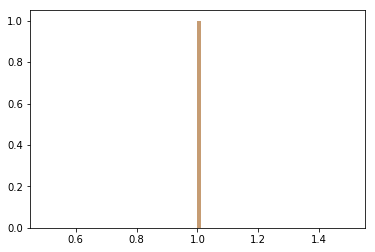

In [8]:
_ = plt.hist(ns1_h, bins=100, alpha=0.5)
_ = plt.hist(ns1_i, bins=100, alpha=0.5)

### Compare number of s2

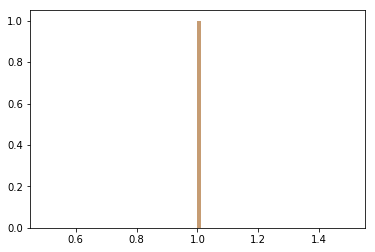

In [9]:
_ = plt.hist(ns2_h, bins=100, alpha=0.5)
_ = plt.hist(ns2_i, bins=100, alpha=0.5)

### Compare time at maximum energy in s2

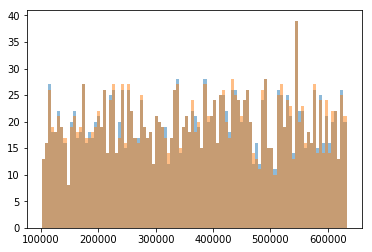

In [10]:
_ = plt.hist(s2_time_max_e_h, bins=100, alpha=0.5)
_ = plt.hist(s2_time_max_e_i, bins=100, alpha=0.5)

### Compare s2 PMT energies

The shape is quite similar but there is a scale difference, hypathia does not perform any calibration, just takes the true waveform coming from detsim, this difference must be due to that.

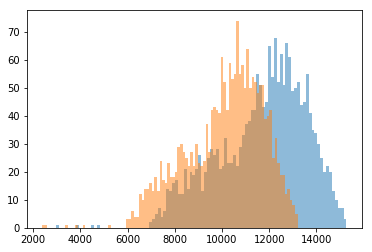

In [11]:
_ = plt.hist(s2_energies_h, bins=100, alpha=0.5)
_ = plt.hist(s2_energies_i, bins=100, alpha=0.5)

### Compare s2 SiPM charges

Again, distributions are quite similar with a small scale difference due to the lack of calibration.

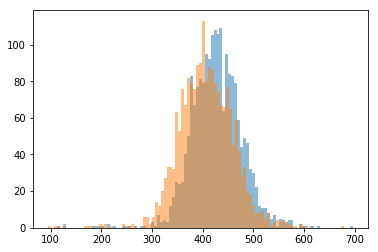

In [12]:
_ = plt.hist(s2_charges_h, bins=100, alpha=0.5)
_ = plt.hist(s2_charges_i, bins=100, alpha=0.5)

### Compare S1 PMT energies

S1 energy in Hypathia can only be an integer number since we are not adding any noise, gains, etc. Apart from that seems to be ok.

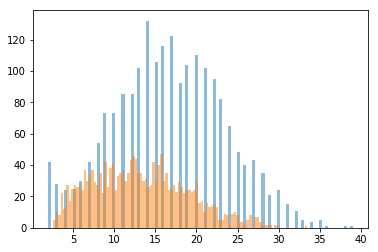

In [13]:
_ = plt.hist(s1_energies_h, bins=100, alpha=0.5)
_ = plt.hist(s1_energies_i, bins=100, alpha=0.5)

### Compare S1 SiPM charges

Since this is Kr, SiPMs don't see any light coming from S1.

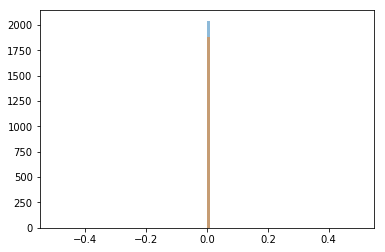

In [14]:
_ = plt.hist(s1_charges_h, bins=100, alpha=0.5)
_ = plt.hist(s1_charges_i, bins=100, alpha=0.5)